In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

## Importing Data and Data Cleansing

In [3]:
df=pd.read_csv('Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


#### Exploring the data data type of each columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [7]:
df['CITY'].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [8]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [11]:
# Checking Null Values
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

##### There are no missing value in the datasets

## Data Visualization

<AxesSubplot:xlabel='Age', ylabel='Density'>

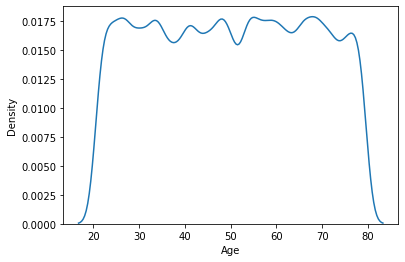

In [29]:
#Distribution of age
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

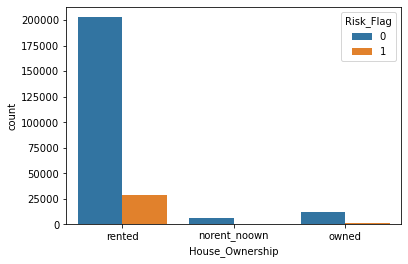

In [32]:
#Effect of House ownership on Risk Flag

sns.countplot(x=df['House_Ownership'],hue=df['Risk_Flag'])

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

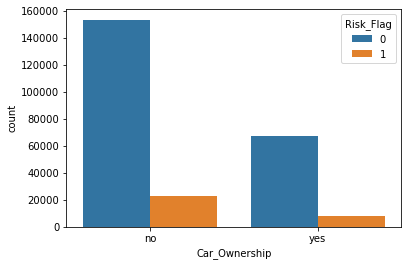

In [33]:
#Effect of Car ownership on Risk Flag

sns.countplot(x=df['Car_Ownership'],hue=df['Risk_Flag'])

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

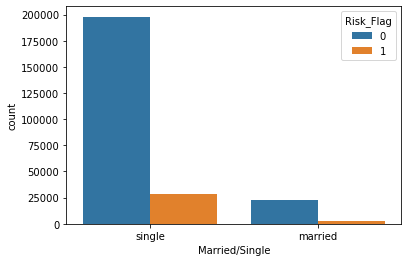

In [34]:
#Effect of Marital Status on Risk Flag

sns.countplot(x=df['Married/Single'],hue=df['Risk_Flag'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

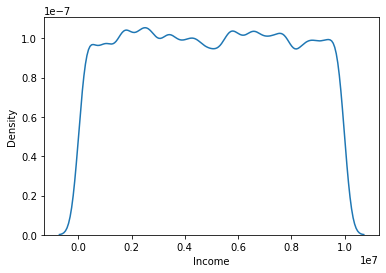

In [41]:
# Distribution of Income
sns.kdeplot(df['Income'])

In [42]:
#Relationship of Numerical variable on target variable 

<AxesSubplot:>

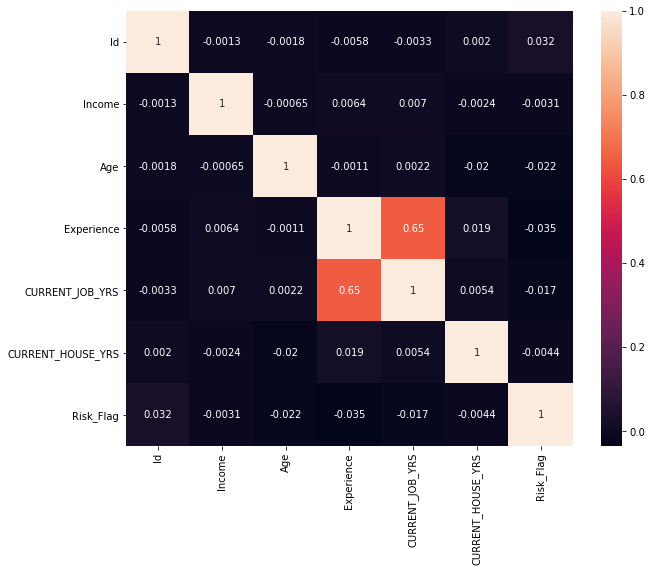

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True)

### Checking for outliers

<AxesSubplot:ylabel='Age'>

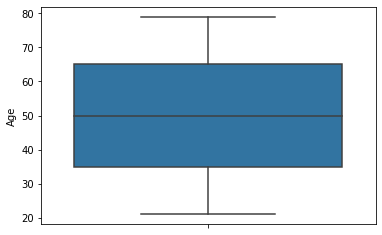

In [51]:

sns.boxplot(y=df['Age'])

<AxesSubplot:ylabel='Income'>

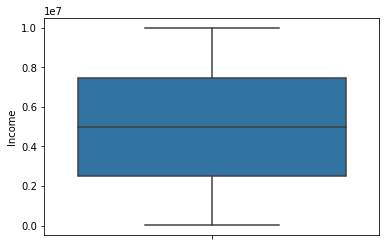

In [52]:
sns.boxplot(y=df['Income'])

([<matplotlib.patches.Wedge at 0x1fa75976df0>,
 [Text(-1.0652055786125378, 0.4334017481422154, 'Non-Defaulter'),
  Text(1.1115188328824717, -0.45224538046019697, 'Defaulter')],
 [Text(-0.6020727183462171, 0.2449662054716869, '87.7%'),
  Text(0.6483859858481084, -0.2638098052684482, '12.3%')])

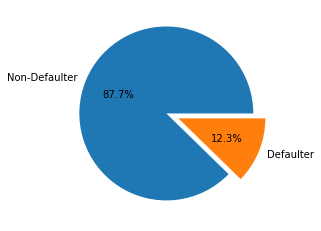

In [75]:
r=df['Risk_Flag'].value_counts()
plt.pie(r,explode=[0.05,0.1],labels=['Non-Defaulter','Defaulter'],
        autopct='%1.1f%%')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

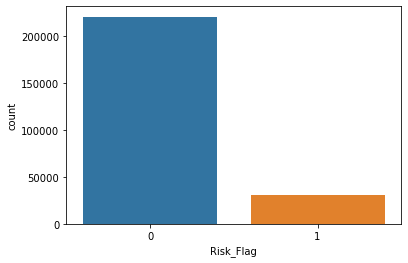

In [79]:
sns.countplot(df['Risk_Flag'])

In [77]:
print(df['Profession'].nunique())
print(df['STATE'].nunique())
print(df['CITY'].nunique())

51
29
317


In [80]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

## Summary on Data Visualization

1) Class 0 represents 88.00% of the dataset, while class 1 only 12.00%. The datasets is highly imbalanced

2)There are no outliers in datasets.

3)Strong correlation between Experience and CURRENT_JOB_YRS.May drop one column during feature selection process or use Principal Component Analysis (PCA)

4)Married/Single, House_Ownership, Car_Ownership can be binarised or one-hot encoded

5)We can find the relationship between target variable and categorical variable using Chi-square test

### Feature Engineering

In [87]:
#Function for hypothesis testing

def chi_sqaure_test(data):
    stat, p, dof, expected=chi2_contingency(data)
    alpha=0.05
    print("p value is " + str(p))
    
    if p<=alpha:
        print("Dependent (reject H0)")
    else:
        print('Independent (H0 holds true)')

### Chi Square Test

In [85]:
car_ownership_risk_flag=pd.crosstab(df['Car_Ownership'],df['Risk_Flag'])
car_ownership_risk_flag

Risk_Flag,0,1
Car_Ownership,,
no,153439,22561
yes,67565,8435


In [88]:
chi_sqaure_test(car_ownership_risk_flag)

p value is 1.7350853850183746e-33
Dependent (reject H0)


In [99]:
marital_status_risk_flag=pd.crosstab(df['Married/Single'],df['Risk_Flag'])
marital_status_risk_flag

Risk_Flag,0,1
Married/Single,,
married,23092,2636
single,197912,28360


In [100]:
chi_sqaure_test(marital_status_risk_flag)

p value is 3.773053705715196e-26
Dependent (reject H0)


In [101]:
house_ownership_risk_flag=pd.crosstab(df['House_Ownership'],df['Risk_Flag'])
house_ownership_risk_flag

Risk_Flag,0,1
House_Ownership,,
norent_noown,6469,715
owned,11758,1160
rented,202777,29121


In [104]:
chi_sqaure_test(house_ownership_risk_flag)

p value is 1.8381930028370595e-40
Dependent (reject H0)



Performing Principal Component Analysis on CURRENT_JOB_YRS and Experience

In [115]:
#first perform standardization
features=['CURRENT_JOB_YRS','Experience']
df_std=df[features]
df_pca_scaled=(df_std-df_std.mean(axis=0))/df_std.std()
df_pca_scaled


,CURRENT_JOB_YRS,Experience
0,-0.914129,-1.180230
1,0.731035,-0.014067
2,-0.639935,-1.013635
3,-1.188323,-1.346825
4,-0.914129,0.152528
...,...,...
251995,-0.091547,0.485718
251996,-0.091547,-0.014067
251997,0.182647,-0.513851
251998,-1.736711,-1.680014


In [121]:
pca=PCA()
df_pca=pca.fit_transform(df_pca_scaled)
feature_names=[f"PC{i+1}"for i in range(df_pca.shape[1])]
df_pca=pd.DataFrame(df_pca,columns=feature_names)
df_pca.head()

,PC1,PC2
0,-1.480935,-0.188162
1,0.506973,-0.526866
2,-1.169251,-0.264246
3,-1.792620,-0.112078
4,-0.538533,0.754240


In [123]:
df1=pd.concat([df,df_pca],axis=1)
df1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC1,PC2
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,-1.480935,-0.188162
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.506973,-0.526866
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,-1.169251,-0.264246
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,-1.792620,-0.112078
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,-0.538533,0.754240


#### Label encoding for categorical variables

In [129]:
df1['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [133]:
features = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
label_encoder=LabelEncoder()
for col in features:
    df1[col]=label_encoder.fit_transform(df1[col])

In [135]:
 df1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC1,PC2
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0,-1.480935,-0.188162
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0,0.506973,-0.526866
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0,-1.169251,-0.264246
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1,-1.792620,-0.112078
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1,-0.538533,0.754240


In [136]:
df_final=df1.drop('Id',axis=1)

In [142]:
X=df_final.drop('Risk_Flag',axis=1)
y=df_final['Risk_Flag']

In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [148]:
sm=SMOTE(random_state=500)
X_res,y_res=sm.fit_resample(X_train,y_train)

### Machine Learning model for binary classification

##### 1)KNN 

In [151]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_res,y_res)
y_pred=model.predict(X_test)
accuracy=model.score(X_test,y_test)
accuracy

0.8574801587301587

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     44259
           1       0.44      0.60      0.51      6141

    accuracy                           0.86     50400
   macro avg       0.69      0.75      0.71     50400
weighted avg       0.88      0.86      0.87     50400



#### 2)Random Forest Classification

In [154]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(criterion='gini',random_state=4)
model.fit(X_res,y_res)
y_pred=model.predict(X_test)
accuracy=model.score(X_test,y_test)
accuracy

0.8810119047619047

In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     44259
           1       0.51      0.81      0.62      6141

    accuracy                           0.88     50400
   macro avg       0.74      0.85      0.78     50400
weighted avg       0.91      0.88      0.89     50400



#### Conclusion


Random Forest is best suitable model for our dataset with accuracy 88%.